# Exploration of actors repartition based on gender
The aim of this notebook is to explore the dataset with the prism of gender. Do we have enough data available ? What cleaning is necessary ? Do we have enough representation accross categories, countries ? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Data source: http://www.cs.cmu.edu/~ark/personas/

# Define the data path
CLEAN_DATA_PATH = 'clean_data/'

### Functions

In [3]:
# Function: filter NaN of a given column
def filter_nan(dataframe, column_to_filter):
    '''
    Create a new dataframe filtering out the NaN values
    of the given column of the given dataframe 
    :param dataframe: pandas.DataFrame
    :param column_to_filter: str
    :return: new dataframe
    '''
    new_df = dataframe.dropna(axis=0, subset=column_to_filter)
    print(f"Cleaning of {column_to_filter} : {new_df.shape[0]} entries left")
    return new_df

## Load the data

In [4]:
# Load the unfiltered data
characters_df = pd.read_csv(CLEAN_DATA_PATH + "characters.csv")
characters_df = characters_df.rename(columns={"name":"character_name", "id":"character_id"})
display(characters_df)


initial_entries_number = characters_df.shape[0]
print(f"Unfiltered dataset: {initial_entries_number} entries")


# TODO delete once migrated to milestone2.ipynb
movies_df = pd.read_csv(CLEAN_DATA_PATH + "movies.csv")
display(movies_df)

,movie_wiki_id,movie_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,character_id,actor_id,movie_release_year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1992
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1957
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,1957


Unfiltered dataset: 450669 entries


,wiki_id,id,name,release_date,revenue,runtime,area,release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,Northen America,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,Northen America,2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Other,1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,Europe,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,Europe,1983
...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,Northen America,2011
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,Europe,2011
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,Northen America,1972
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Asia,1992


## Missing data check

In [ ]:
# Compute the proportion of missing data for gender
def percentage_missing_gender(dataframe, region):
    
    # Indicator variable
    dataframe["gender_is_na"] = dataframe["gender"].isna()

    # Calculate % of missing data
    missing_gender_data = dataframe.groupby("release_year")["gender_is_na"].mean()

    # Plot it
    ax.plot(missing_gender_data)
    ax.set(xlabel = "Year", ylabel = "Percentage")
    ax.set_title(region)
    x_values = ax.get_xticks()
    new_x = [x_values[i] for i in [0, len(x_values) //2, -1]]
    ax.set_xticks(new_x)

    # Return overall percentage of missing data
    prop_missing_data = sum(dataframe["gender_is_na"])
    return prop_missing_data

fig, axs = plt.subplots(2, sharey=True, figsize=(12, 6))
fig.suptitle("Percentage of missing data per year in actor_gender")
prop_missing_gender_asia = percentage_missing_gender()


## Data cleaning

To work with the data, we clean it once more after the pre-processing step done above. We chose to clean the dataset depending on the different aspects treated to avoid overcleaning of our data. In our case, the essential features that need to be paid attention to are movie_release_date, actor_gender, actor_age and perhaps name. We leave aside all the other features for the moment, as we will not use them in this part.  

We isolated some rows concentrating problematic datas below :

In [5]:
characters_df.loc[[0, 337, 1104, 3892]]

,movie_wiki_id,movie_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,character_id,actor_id,movie_release_year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001
337,27374355,/m/0by1_ff,NaN,NaN,1953-03-16,F,1.60,NaN,Isabelle Huppert,NaN,/m/0bykcy4,NaN,/m/012g92,NaN
1104,24053482,/m/07kg7s3,1997,Booking Officer,NaN,NaN,NaN,NaN,NaN,NaN,/m/07vrjlb,/m/07vrjlf,NaN,1997
3892,5917218,/m/0fdf3y,1965,NaN,1983-03-03,F,1.75,NaN,Kim Smith,-18.0,/m/04mb5kf,NaN,/m/03pjkv,1965


In the table above we observe that movie_release_date, actor_gender, actor_age sometimes contain NaN values. More problematically, actor_age can present negative values, which we need to manage: we do so below. 

In [6]:
# Remove rows with NaN in column actor_gender
filt_characters_df = filter_nan(characters_df, "actor_gender")

# Remove rows with NaN or absurd values in actor_age
filt_characters_df = filter_nan(filt_characters_df, "actor_age")
filt_characters_df = filt_characters_df[filt_characters_df["actor_age"] > 0]
filt_characters_df = filt_characters_df[filt_characters_df["actor_age"] < 120]

# Remove rows with NaN in movie_release_date
filt_characters_df = filter_nan(filt_characters_df, "movie_release_date")

# Remove rows with NaN in name (we postulate that if the name)
filt_characters_df = filter_nan(filt_characters_df, "character_name")

Cleaning of actor_gender : 405060 entries left
Cleaning of actor_age : 290770 entries left
Cleaning of movie_release_date : 290349 entries left
Cleaning of character_name : 133294 entries left


Note that the order of column filtering of NaN is independent of the number of entries we obtain at the end.

In [7]:
display(filt_characters_df)

,movie_wiki_id,movie_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,character_id,actor_id,movie_release_year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450658,913762,/m/03pcrp,1992-05-21,Lord Feff,1960-04-28,M,NaN,NaN,Steven Blum,32.0,/m/0kr408g,/m/0kr408l,/m/044_7j,1992
450660,913762,/m/03pcrp,1992-05-21,Additional Voices,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr405f,/m/0kr405k,/m/0gn4bz,1992
450661,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992
450662,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1992


## Complete the data

We would like to add features that could ease our work, which we do after the cleaning, as it makes no sense to complete information on datas that we clean afterwards. The dataset `movies` contains the information of interest 

In [8]:
# Only keep the release_year, area and movie_id columns
movies_df = movies_df[["release_year", "area", "id"]]

# Merge the two dataframes 
filt_characters_df = pd.merge(filt_characters_df, movies_df, left_on="movie_id", right_on="id")

# Remove the column id, if duplicate of column id
if ((filt_characters_df["id"] == filt_characters_df["movie_id"]).all()):
    filt_characters_df = filt_characters_df.drop(columns=["id"]) 

## Subset the data

Let's create two dataframes, regrouping actors of the same gender

In [9]:
IS_FEMALE = filt_characters_df["actor_gender"] == "F"

# Create dataframe containing only actresses or actors
actresses_df = filt_characters_df[IS_FEMALE]
actors_df = filt_characters_df[~IS_FEMALE]

display(actresses_df)
display(actors_df)
print(f"""There is {actresses_df.shape[0]} entries in actresses_df and {actors_df.shape[0]} entries in actors_df.
When combining both dataframes, we have {actresses_df.shape[0]+actors_df.shape[0]} entries. 
The filtered dataframe has {filt_characters_df.shape[0]} entries""")

#TODO Create csv of subdataframes ? 

,movie_wiki_id,movie_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,character_id,actor_id,movie_release_year,release_year,area
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001,2001,Northen America
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001,2001,Northen America
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001,2001,Northen America
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2001,2001,Northen America
6,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m,2001,2001,Northen America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133280,30553937,/m/0g9ts5h,1998-03-07,Shelley,1965-11-16,F,NaN,NaN,Anneliza Scott,32.0,/m/0jxtpz7,/m/0jxtpzb,/m/0gc5tjv,1998,1998,Northen America
133282,30553937,/m/0g9ts5h,1998-03-07,Julia,1975-10-10,F,NaN,NaN,Natalie Ramsey,22.0,/m/0jxtsw7,/m/0jxtswb,/m/027dt0m,1998,1998,Northen America
133285,913762,/m/03pcrp,1992-05-21,Ishtar,1970-02-19,F,NaN,NaN,笠原弘子,22.0,/m/0kr40cw,/m/0kr40cz,/m/01qwg7h,1992,1992,Asia
133286,913762,/m/03pcrp,1992-05-21,Sylvie,1966-12-20,F,NaN,NaN,Yumi Tōma,25.0,/m/0kr40cd,/m/0kr40ch,/m/08g3fb,1992,1992,Asia


,movie_wiki_id,movie_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,character_id,actor_id,movie_release_year,release_year,area
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001,2001,Northen America
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001,2001,Northen America
7,975900,/m/03vyhn,2001-08-24,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0,2001,2001,Northen America
8,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,2001,2001,Northen America
9,975900,/m/03vyhn,2001-08-24,McSimms,1944-07-22,M,1.800,NaN,Peter Jason,57.0,/m/0bgchxd,/m/0bgchxh,/m/03d663h,2001,2001,Northen America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133288,913762,/m/03pcrp,1992-05-21,Maj. Nexx,1960-04-28,M,NaN,NaN,Steven Blum,32.0,/m/0kr40d9,/m/0kr40df,/m/044_7j,1992,1992,Asia
133289,913762,/m/03pcrp,1992-05-21,Lord Feff,1960-04-28,M,NaN,NaN,Steven Blum,32.0,/m/0kr408g,/m/0kr408l,/m/044_7j,1992,1992,Asia
133290,913762,/m/03pcrp,1992-05-21,Additional Voices,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr405f,/m/0kr405k,/m/0gn4bz,1992,1992,Asia
133291,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992,1992,Asia


There is 48506 entries in actresses_df and 84788 entries in actors_df.
When combining both dataframes, we have 133294 entries. 
The filtered dataframe has 133294 entries


Note that there is almost half less entries in actresses_df than in actors_df : after data cleaning we have approximately half less data with female characters than male characters. 
It could be interesting to analyse if one gender present more uncomplete data (containing NaN values) in movie_release_date and actor_name than the other. 

Before plotting any data, let's produce some essential statistics: 

In [10]:
actresses_df.describe()

,movie_wiki_id,actor_height,actor_age
count,4.850600e+04,31446.000000,48506.000000
mean,1.243029e+07,1.665097,32.833649
std,1.071773e+07,0.068118,13.443850
min,3.217000e+03,0.610000,1.000000
25%,2.528212e+06,1.620000,24.000000
50%,9.311522e+06,1.670000,30.000000
75%,2.185521e+07,1.710000,39.000000
max,3.750192e+07,1.910000,96.000000


In [11]:
actors_df.describe()

,movie_wiki_id,actor_height,actor_age
count,8.478800e+04,48715.000000,84788.000000
mean,1.175831e+07,1.844004,40.144478
std,1.076421e+07,4.226882,13.888066
min,3.217000e+03,0.813000,1.000000
25%,2.017210e+06,1.750000,30.000000
50%,8.057423e+06,1.800000,39.000000
75%,2.113900e+07,1.854000,49.000000
max,3.750192e+07,510.000000,94.000000


## Visualizations based on gender

### Age repartition

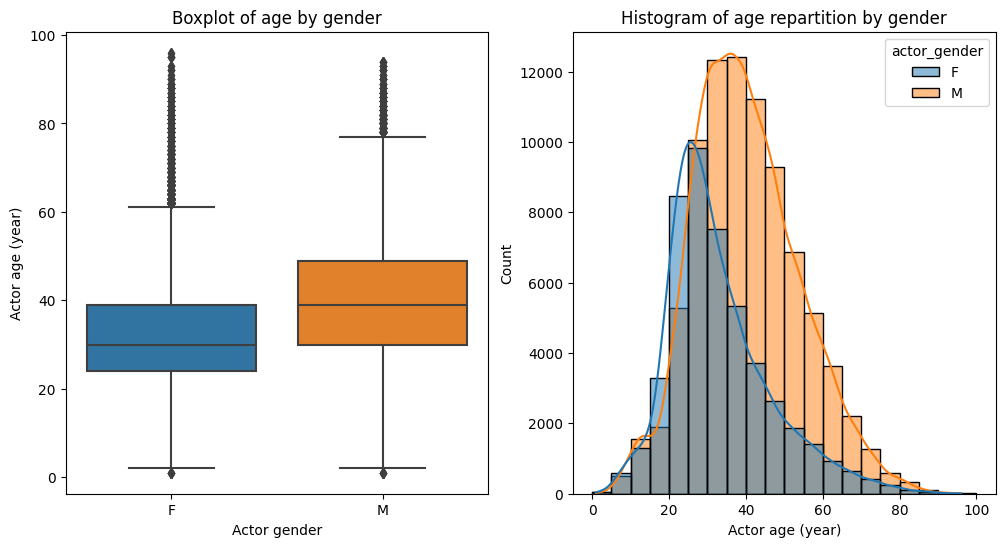

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
age_bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# Boxplot
boxplot_gender_age = sns.boxplot(data = filt_characters_df, x="actor_gender", y="actor_age", ax=ax[0])
boxplot_gender_age.set_title("Boxplot of age by gender")
boxplot_gender_age.set_ylabel("Actor age (year)")
boxplot_gender_age.set_xlabel("Actor gender")

# Histogram 
hist_gender_age = sns.histplot(data = filt_characters_df, x = "actor_age", hue = "actor_gender", stat="count", kde = True, bins=age_bins)
hist_gender_age.set_title("Histogram of age repartition by gender")
hist_gender_age.set_xlabel("Actor age (year)")
hist_gender_age.set_ylabel("Count")

plt.show()

#FIXME Boxplot change the size of the points/do something about the points too big & too close

### Comparison of actresses and actors number over the years 

In [267]:
# # Define a dataframe and group by  release_year
# grouped_by_year = filt_characters_df[["actor_gender", "area", "release_year"]]
# grouped_by_year.insert(3, "count", 1)
# grouped_by_year = grouped_by_year.groupby("release_year").count()
# display(grouped_by_year)
# grouped_by_year.set_index("count")

In [268]:
# line_gender_over_years = sns.lineplot(x = grouped_by_year["release_year"], y = grouped_by_year.index, hue = filt_characters_df["actor_gender"])

### Comparison of percentage of actresses by World regions